In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, Markdown

import sys, os
sys.path.insert(0, '../py_scripts')

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time
import glob
import pickle

import push_pull as pp
import noise_models as noise
import fig_plot as fplot
import model_fitting as fit

sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':False})

In [2]:
df_list = []


try:
    with open('/projectnb/biophys/jrocks/proj_push_pull/data/push_data.pkl', 'rb') as pkl_file:

        data = pickle.load(pkl_file)
        df_list.append(data['df_info'])
except:
    pass
    
    
for i, f in enumerate(glob.iglob(r'/projectnb/biophys/jrocks/proj_push_pull/data/push_data_*.pkl')):
    
    if i % 1000 == 0:
        print(i)
   
    with open(f, 'rb') as pkl_file:
    
        data = pickle.load(pkl_file)

        df_info = data['df_info']
        
    df_list.append(df_info)
    
    
print(len(df_list))
    
df_info = pd.concat(df_list)

df_info.set_index(['dataset', 'seed'], inplace=True)
df_info.sort_index(inplace=True)

df_info = df_info[~df_info.index.duplicated(keep='first')].copy()

print("seeds", df_info.index.get_level_values('seed').nunique())

df_info.reset_index(inplace=True)


display(df_info)


with open('/projectnb/biophys/jrocks/proj_push_pull/data/push_data.pkl', 'wb') as pkl_file:
    
    data = {'df_info': df_info}
    pickle.dump(data, pkl_file)


0
20
seeds 20


,dataset,seed,zipper,kinase,model,WT_empty_frac,WT_anti_scale,ST_empty_frac,ST_anti_scale,bg_phospho_rate,kinase_phospho_rate,kinase_bind_affin
0,E+E,0,E+E,wt,push,0.026679,0.250636,0.000171,-0.129601,0.000630,3.436471,822998.405749
1,E+E,1,E+E,wt,push,0.019177,0.236795,0.000010,-0.132078,0.000625,3.413248,902779.538565
2,E+E,2,E+E,wt,push,0.023711,0.246075,0.000850,-0.127710,0.000647,3.429377,861402.080342
3,E+E,3,E+E,wt,push,0.031178,0.256603,0.001108,-0.121892,0.000567,3.604036,846054.963666
4,E+E,4,E+E,wt,push,0.023274,0.241165,0.000128,-0.127104,0.000629,3.668345,980934.949470
...,...,...,...,...,...,...,...,...,...,...,...,...
195,wt,15,generic,wt,push,0.019571,0.343114,0.002427,-0.093018,0.000588,3.516766,1551.949667
196,wt,16,generic,wt,push,0.021696,0.344793,0.008303,-0.082296,0.000575,3.575570,1616.750998
197,wt,17,generic,wt,push,0.021441,0.351930,0.009775,-0.078040,0.000576,3.538399,1726.836080
198,wt,18,generic,wt,push,0.020796,0.342299,0.003144,-0.085422,0.000584,3.715167,1550.089742


In [8]:
for f in glob.iglob(r'/projectnb/biophys/jrocks/proj_push_pull/data/push_data_*.pkl'):
    os.remove(f)

In [23]:
df_avg = df_info.groupby(['dataset', 'zipper', 'kinase']).mean()
df_err_low = df_avg - df_info.groupby(['dataset', 'zipper', 'kinase']).quantile(0.25)
df_err_up = df_info.groupby(['dataset', 'zipper', 'kinase']).quantile(0.75) - df_avg
df_std = df_info.groupby(['dataset', 'zipper', 'kinase']).std()


display(df_avg)

df_aff = pd.DataFrame({'mean': df_avg['kinase_bind_affin'],
                      'err_low': df_err_low['kinase_bind_affin'],
                      'err_up': df_err_up['kinase_bind_affin'],
                      'sem': df_std['kinase_bind_affin'],
                      'pe': 100*df_std['kinase_bind_affin']/df_avg['kinase_bind_affin']},
                     index=df_avg.index)

df_aff = df_aff.groupby(['zipper']).first().sort_values('mean')

display(df_aff)


df_prate = pd.DataFrame({'mean': df_avg['kinase_phospho_rate'],
                      'err_low': df_err_low['kinase_phospho_rate'],
                      'err_up': df_err_up['kinase_phospho_rate'],
                      'sem': df_std['kinase_phospho_rate'],
                      'pe': 100*df_std['kinase_phospho_rate']/df_avg['kinase_phospho_rate']},
                     index=df_avg.index)

df_prate = df_prate.groupby(['kinase']).first().sort_values('mean')


display(df_prate)

,,,seed,WT_empty_frac,WT_anti_scale,ST_empty_frac,ST_anti_scale,bg_phospho_rate,kinase_phospho_rate,kinase_bind_affin
dataset,zipper,kinase,,,,,,,,
E+E,E+E,wt,9.5,0.026004,0.250227,0.000403,-0.129204,0.000607,3.565755,9.171153e+05
I+E,I+E,wt,9.5,0.059285,0.479387,0.000199,0.040300,0.000607,3.565755,1.078748e-01
KD,generic,KD,9.5,0.000208,0.007653,0.006441,-0.125442,0.000607,0.000001,1.689000e+03
R460A,generic,R460A,9.5,0.000077,0.394203,0.016831,-0.085742,0.000607,1.335789,1.689000e+03
R460K,generic,R460K,9.5,0.000117,0.294479,0.002465,-0.129215,0.000607,0.252670,1.689000e+03
R460S,generic,R460S,9.5,0.000162,0.307302,0.001997,-0.136979,0.000607,0.020568,1.689000e+03
RR+A,RR+A,wt,9.5,0.000218,0.498645,0.041219,-0.271846,0.000607,3.565755,6.964776e+07
S+A,S+A,wt,9.5,0.000344,0.492417,0.021499,-0.162962,0.000607,3.565755,1.262950e+05
S+E,S+E,wt,9.5,0.035661,0.243880,0.000274,-0.135912,0.000607,3.565755,3.386746e+05


,mean,err_low,err_up,sem,pe
zipper,,,,,
I+E,1.078748e-01,8.314443e-03,7.419724e-03,1.492047e-02,13.831282
generic,1.689000e+03,1.395110e+02,1.306636e+02,2.001842e+02,11.852229
S+A,1.262950e+05,4.247617e+03,4.159848e+03,6.466313e+03,5.120006
S+E,3.386746e+05,1.733495e+04,1.589357e+04,1.844384e+04,5.445889
E+E,9.171153e+05,5.669468e+04,4.711580e+04,5.818165e+04,6.343984
RR+A,6.964776e+07,3.099226e+06,3.703191e+06,5.204929e+06,7.473218


,mean,err_low,err_up,sem,pe
kinase,,,,,
KD,0.000001,6.499195e-08,6.164656e-08,1.137035e-07,7.725296
R460S,0.020568,4.272589e-04,5.430151e-04,8.524576e-04,4.144605
R460K,0.252670,4.400529e-03,4.359251e-03,8.293324e-03,3.282272
R460A,1.335789,3.047635e-02,3.259401e-02,4.097345e-02,3.067360
wt,3.565755,7.183083e-02,6.523284e-02,1.007882e-01,2.826560


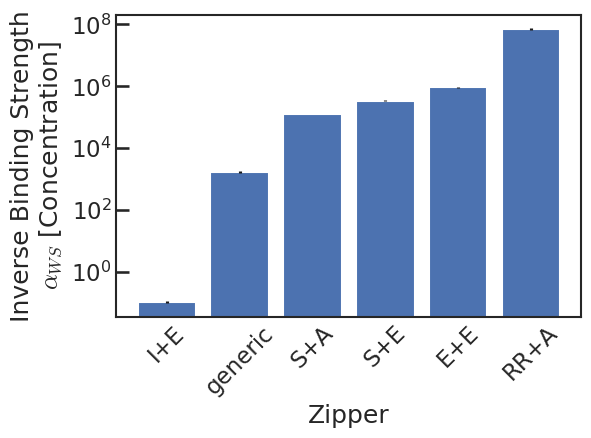

In [19]:

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.bar(df_aff.index, df_aff['mean'], yerr=[df_aff['err_low'], df_aff['err_up']])

ax.set_yscale('log')
ax.set_xlabel("Zipper")
ax.set_ylabel("Inverse Binding Strength\n" + r"$\alpha_{WS}$ [Concentration]")
plt.xticks(rotation=45)

plt.show()

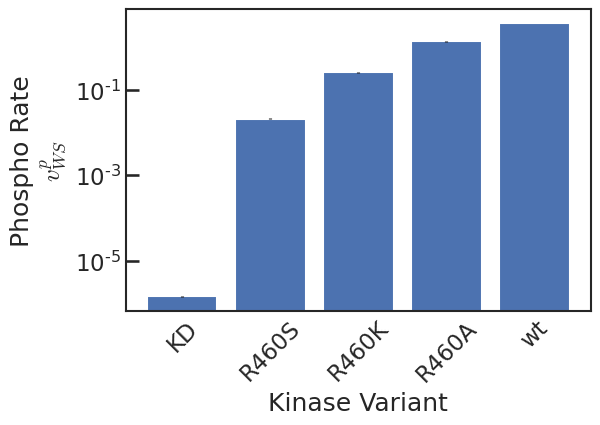

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.bar(df_prate.index, df_prate['mean'], yerr=[df_prate['err_low'], df_prate['err_up']])

ax.set_yscale('log')
ax.set_xlabel("Kinase Variant")
ax.set_ylabel("Phospho Rate\n" + r"$v^p_{WS}$")
plt.xticks(rotation=45)

plt.show()